#### This is an unsupervised statistical technique used to examine the interrelations among a set of variables in order to identify underlying structure of them


### Prinicpal Component Analysis aka General Factor Analysis


In [ ]:
# Regression: Determines line of best fit to the

# PCA: Creates several orthogonal lines of best fit to the data the data



In [ ]:
# This process allows us to create new lines/axis that encapsulate most of the variance
# this helps eliminate variables in the data analysis

In [ ]:
# This is more an analysis technique than

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
#load up the breast cancer library
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
df =  pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [16]:
# PCA from scikit learn
from sklearn.preprocessing import StandardScaler

In [17]:
# We first need to scale the data 
scaler = StandardScaler()

In [19]:
scaler.fit(df)

StandardScaler()

In [20]:
scaled_data = scaler.transform(df)

## The process is 
1. Instantiate a PCA object
2. Find the principal components using the fit method
3. Apply the rotation and dimensionality reduction by calling transform

In [ ]:
# You can specify what components to keep in the PCA


In [21]:
# PCA
from sklearn.decomposition import PCA

In [22]:
pca =  PCA(n_components = 2)

In [23]:
pca.fit(scaled_data)

PCA(n_components=2)

In [26]:
x_pca = pca.transform(scaled_data)

In [27]:
scaled_data.shape

(569, 30)

In [28]:
x_pca.shape

(569, 2)

(-15.0, 10.0)

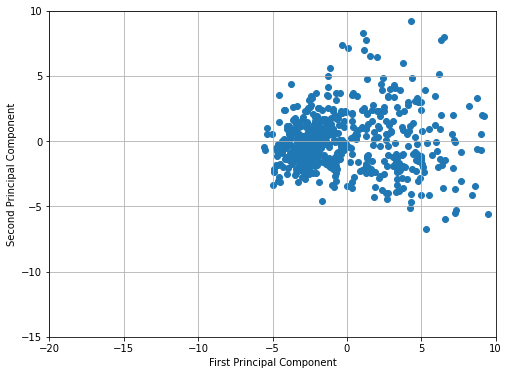

In [41]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid()
plt.xlim(-20,10)
plt.ylim(-15,10)

(-15.0, 10.0)

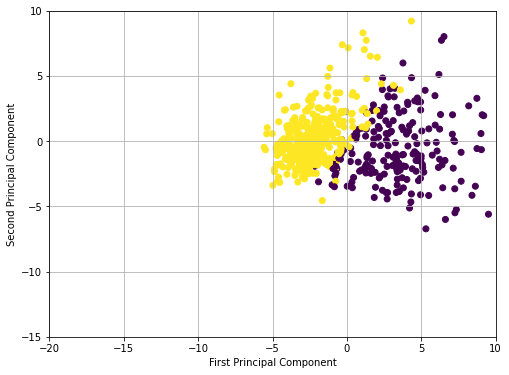

In [40]:
# lets add a new parameter to check for malignance of cancer
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = cancer['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid()
plt.xlim(-20,10)
plt.ylim(-15,10)

In [42]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

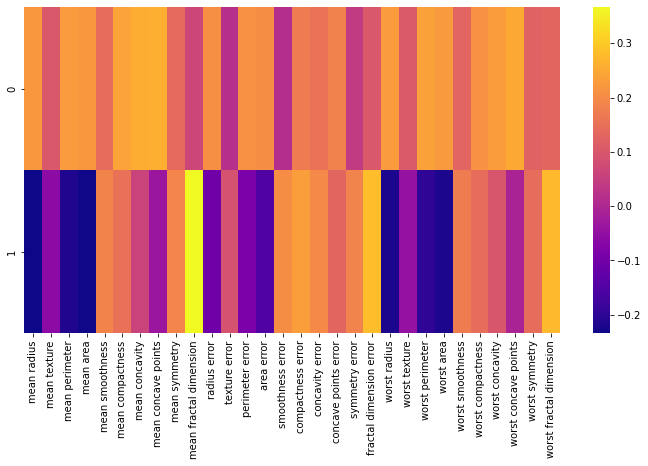

In [45]:
# Heatmap between the correlation of the principal components and each attribute of the data
plt.figure(figsize = (12,6))
sns.heatmap(df_comp, cmap ='plasma')

In [46]:
# You can do things such as use this data with a logistic regression for this kind of money